# Regularised Perceptron

In [196]:
import numpy as np

In [197]:
import matplotlib.pyplot as plt
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    DO NOT EDIT (from: https://github.com/foxtrotmike/plotit)
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)        
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:            
            conts = sorted([-1+eps,0,1-eps])
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return extent

In [294]:
class RegularisedPerceptron:

    def __init__(self, margin=0, Lambda=0, alpha=0.01, epochs=1000):
        self.margin = margin    # in normal perceptron, the margin is 0
        self.Lambda = Lambda    # this does not exist in the normal perceptron
        self.alpha = alpha      
        self.epochs = epochs
    
    def fit(self, X, y):
        
        dim = X.shape[1]
        self.w = np.random.rand(dim)
        self.b = np.random.rand()

        for _ in range(self.epochs):
            for index, x in enumerate(X):
                label = y[index]
                y_pred = np.dot(self.w, x) + self.b
                
                if label*y_pred < self.margin:
                    self.w += self.alpha * label * x
                    self.b += self.alpha * label
                
            self.w -= self.alpha * self.Lambda * self.w     # regularisation term

    def predict(self, x):
        return np.dot(x, self.w) + self.b




Prediction [0,0]: 3.011834063161817
Prediction [1,0]: 0.984360190869968
Prediction [2,0]: -1.043113681421881
Prediction [3,0]: -3.07058755371373


/var/folders/tm/lpqjh3qj6md2lqjm0_gjlv6m0000gn/T/ipykernel_21430/126026940.py:52: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


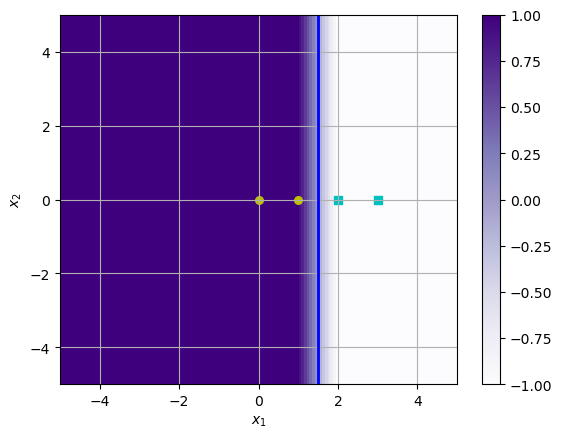

In [295]:
if __name__ == '__main__':

    X = np.array([[0,0], [1,0], [2,0], [3,0]])
    y = np.array([1,1,-1,-1])

    clf = RegularisedPerceptron(margin=1, Lambda=0.1, epochs=10000)
    clf.fit(X,y)

    print(f'Prediction [0,0]: {clf.predict(np.array([0,0]))}')
    print(f'Prediction [1,0]: {clf.predict(np.array([1,0]))}')
    print(f'Prediction [2,0]: {clf.predict(np.array([2,0]))}')
    print(f'Prediction [3,0]: {clf.predict(np.array([3,0]))}')

    plotit(X,y,clf=clf.predict,conts=[0],extent = [-5,+5,-5,+5])